[1] "FID"        "IID"        "MISS_PHENO" "N_MISS"     "N_GENO"    
[6] "F_MISS"    
[1] 538   6
'data.frame':	538 obs. of  6 variables:
 $ FID       : Factor w/ 538 levels "BadSample_1",..: 12 13 14 15 2 1 8 9 10 11 ...
 $ IID       : Factor w/ 538 levels "BadSample_1",..: 12 13 14 15 2 1 8 9 10 11 ...
 $ MISS_PHENO: Factor w/ 1 level "Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ N_MISS    : int  8202 15127 14224 30159 9490 234164 105637 212529 94937 234100 ...
 $ N_GENO    : int  426901 426901 426901 426901 426901 426901 426901 426901 426901 426901 ...
 $ F_MISS    : num  0.0192 0.0354 0.0333 0.0707 0.0222 ...
NULL
           FID          IID MISS_PHENO N_MISS N_GENO  F_MISS
1  BadSample_6  BadSample_6          Y   8202 426901 0.01921
2  BadSample_7  BadSample_7          Y  15127 426901 0.03543
3  BadSample_8  BadSample_8          Y  14224 426901 0.03332
4  BadSample_9  BadSample_9          Y  30159 426901 0.07065
5 BadSample_10 BadSample_10          Y   9490 426901 0.02223
6  BadSample_1  BadSam

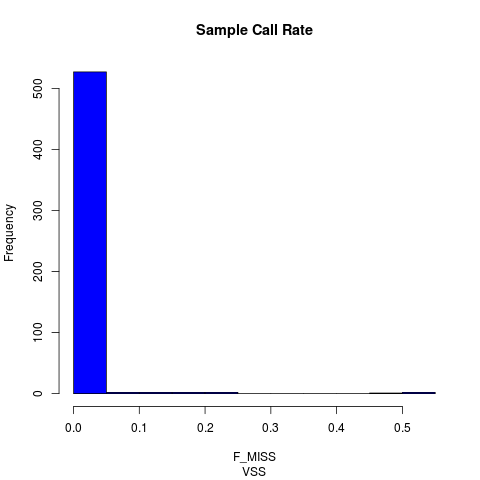

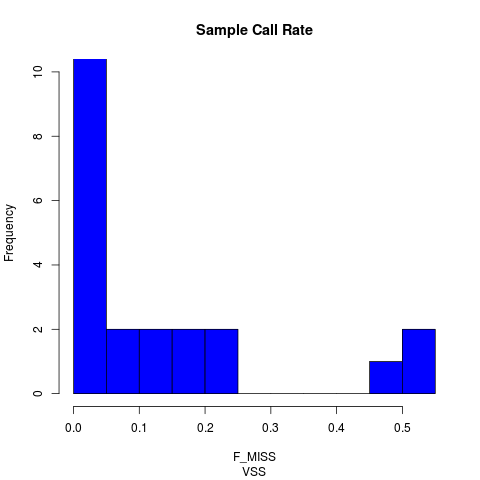

In [31]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#         (1)  SAMPLE CALL RATE    - threshold = 98%                                                               #
# -----------------------------------------------------------------------------------------------------------------#

dir <- "<path to your directory>"
Cohort <- "VSS"
chip <- "Core Exome"
file <- "VSS"
imiss <- read.table(paste(dir,file, "-missing.imiss", sep=""), header=TRUE, fill=TRUE)
print(names(imiss))
print(dim(imiss))
print(str(imiss))
print(head(imiss))
print(summary(imiss$F_MISS))

#plot data
hist(imiss$F_MISS, freq=TRUE, col="blue", border ="black", main = "Sample Call Rate", sub = Cohort, xlab="F_MISS", ylab="Frequency")
#plot with altered axis
hist(imiss$F_MISS, freq=TRUE, col="blue", border ="black", main = "Sample Call Rate", sub = Cohort, xlab="F_MISS", ylab="Frequency", ylim = c(0, 10))
#png(filename="ARGO_CallRate_zoom.png")
#hist(imiss$F_MISS, freq=TRUE, col="blue", border ="black", main = "Sample Call Rate", sub = Cohort, xlab="F_MISS", ylab="Frequency", ylim = c(0, 10))
#dev.off ()

#Samples to be removed at callrate threshold:
cr <- which(imiss$F_MISS > 0.02)  #98% call rate
print(length(cr))
CR <- imiss[cr,]
crnumber <- dim(CR)[1]
write.table(CR, paste(dir,crnumber, "_", Cohort, "_", "_callrate_fails", sep=""), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)


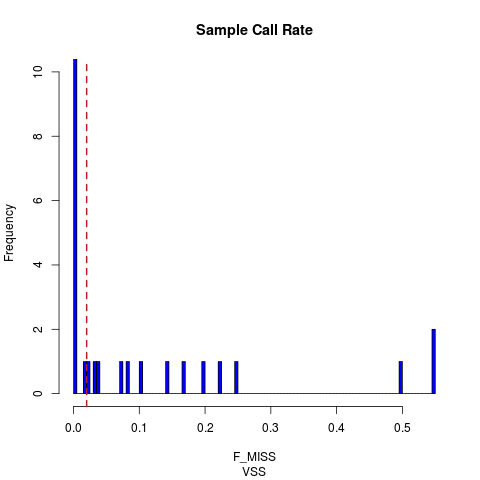

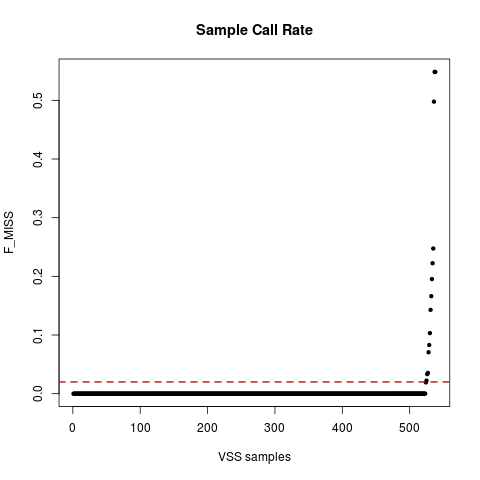

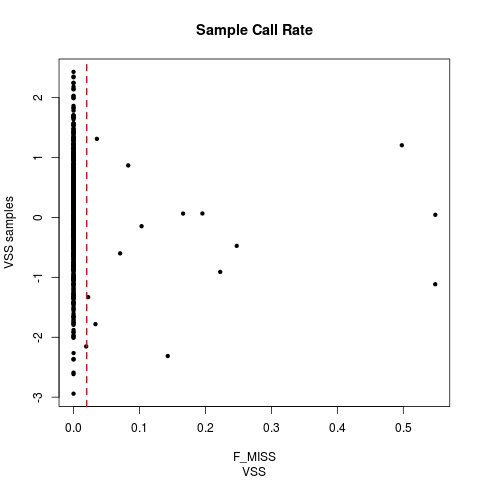

In [33]:
%%R
#Q: Can you try to plot the right number of excluded samples?
#1
hist(imiss$F_MISS, freq=TRUE, col="blue", border ="black", main = "Sample Call Rate", sub = Cohort, xlab="F_MISS", ylab="Frequency", ylim = c(0, 10), breaks=100)
abline(v=0.02, lwd=2, col="firebrick", lty=2)
#2
plot(sort(imiss$F_MISS), pch=20,main = "Sample Call Rate", xlab="VSS samples", ylab="F_MISS",)
abline(h=0.02, lwd=2, col="firebrick", lty=2)
#3
plot(y=rnorm(nrow(imiss)), x=imiss$F_MISS, pch=20, main = "Sample Call Rate", sub = Cohort, xlab="F_MISS", ylab="VSS samples")
abline(v=0.02, lwd=2, col="firebrick", lty=2)

[1] "FID"    "IID"    "PEDSEX" "SNPSEX" "STATUS" "F"     
[1] 538   6
'data.frame':	538 obs. of  6 variables:
 $ FID   : Factor w/ 538 levels "BadSample_1",..: 12 13 14 15 2 1 8 9 10 11 ...
 $ IID   : Factor w/ 538 levels "BadSample_1",..: 12 13 14 15 2 1 8 9 10 11 ...
 $ PEDSEX: int  2 1 2 2 2 2 2 2 1 2 ...
 $ SNPSEX: int  2 1 2 2 2 2 2 2 0 2 ...
 $ STATUS: Factor w/ 2 levels "OK","PROBLEM": 1 1 1 1 1 1 1 1 2 1 ...
 $ F     : num  0.0174 0.9631 -0.0215 0.0383 -0.0517 ...
NULL
           FID          IID PEDSEX SNPSEX STATUS        F
1  BadSample_6  BadSample_6      2      2     OK  0.01742
2  BadSample_7  BadSample_7      1      1     OK  0.96310
3  BadSample_8  BadSample_8      2      2     OK -0.02153
4  BadSample_9  BadSample_9      2      2     OK  0.03834
5 BadSample_10 BadSample_10      2      2     OK -0.05174
6  BadSample_1  BadSample_1      2      2     OK -1.00500
[1] "FID"        "IID"        "MISS_PHENO" "N_MISS"     "N_GENO"    
[6] "F_MISS"    
[1] 538   6
'data.frame':	

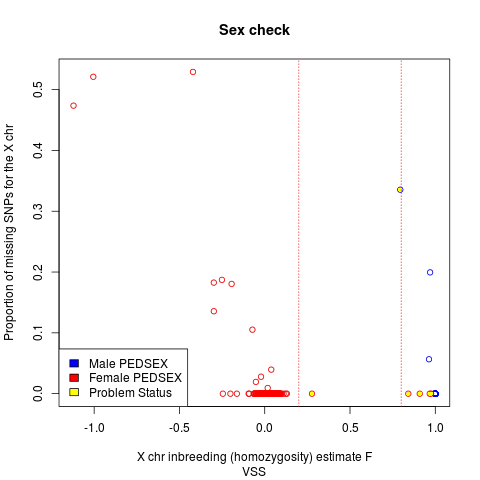

In [52]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#          (2) SEXCHECKING                                                                                         #
# -----------------------------------------------------------------------------------------------------------------#

sexcheck<-read.table(paste(dir, file, "-sexcheck.sexcheck", sep=""), header=TRUE, fill=TRUE)
print(names(sexcheck))
print(dim(sexcheck))
print(str(sexcheck))
print(head(sexcheck))
xchr_imiss<-read.table(paste(dir, file, "-xchr-missing.imiss", sep=""), header=TRUE, fill=TRUE)
print(names(xchr_imiss))
print(dim(xchr_imiss))
print(str(xchr_imiss))
print(head(xchr_imiss))
sexcheck_imiss <- data.frame(FID=sexcheck$FID,IID=sexcheck$IID, PEDSEX=sexcheck$PEDSEX, SNPSEX=sexcheck$SNPSEX, STATUS=sexcheck$STATUS, F_inbreed=sexcheck$F, F_MISS=xchr_imiss$F_MISS)
print(names(sexcheck_imiss))
print(dim(sexcheck_imiss))
print(head(sexcheck_imiss))
plot(sexcheck_imiss$F_inbreed, xchr_imiss$F_MISS, col="grey", main="Sex check", sub= Cohort, xlab="X chr inbreeding (homozygosity) estimate F", ylab="Proportion of missing SNPs for the X chr")
temp <- subset(sexcheck_imiss, sexcheck_imiss$PEDSEX=="1") #1=males
points(temp$F_inbreed, temp$F_MISS, col="Blue")
temp <- subset(sexcheck_imiss, sexcheck_imiss$PEDSEX=="2") #2=females
points(temp$F_inbreed, temp$F_MISS, col="Red")
temp <- subset(sexcheck_imiss, sexcheck_imiss$STATUS=="PROBLEM") #STATUS
points(temp$F_inbreed, temp$F_MISS, col="Yellow", pch=16,cex=0.8)
legend("bottomleft", c("Male PEDSEX","Female PEDSEX", "Problem Status"), fill=c("Blue","Red", "Yellow"))
abline(v=0.8,col=2,lty=3)
abline(v=0.2,col=2,lty=3)

sc <- which(sexcheck_imiss$STATUS=="PROBLEM")
print(length(sc))
SC <- sexcheck_imiss[sc,c(2,3,4,5,6,7)]
scnumber <- dim(SC)[1]
write.table(SC, paste(dir, scnumber, "_", Cohort,  "_sexcheck_fails", sep=""), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)


[1] "ID"          "total"       "num_hom"     "num_het"     "Percent_hom"
[6] "Percent_het"
[1] "FID"        "IID"        "MISS_PHENO" "N_MISS"     "N_GENO"    
[6] "F_MISS"    
[1] 538   6
[1] 538   6
            ID  total num_hom num_het Percent_hom Percent_het
1  BadSample_6 272797  176653   96144       64.76       35.24
2  BadSample_7 267282  174912   92370       65.44       34.56
3  BadSample_8 269489  175109   94380       64.98       35.02
4  BadSample_9 259770  166977   92793       64.28       35.72
5 BadSample_10 271735  177546   94189       65.34       34.66
6  BadSample_1 129719   56347   73372       43.44       56.56
           FID          IID MISS_PHENO N_MISS N_GENO  F_MISS
1  BadSample_6  BadSample_6          Y   3754 276551 0.01357
2  BadSample_7  BadSample_7          Y   9269 276551 0.03352
3  BadSample_8  BadSample_8          Y   7062 276551 0.02554
4  BadSample_9  BadSample_9          Y  16781 276551 0.06068
5 BadSample_10 BadSample_10          Y   4816 276551 0.0174

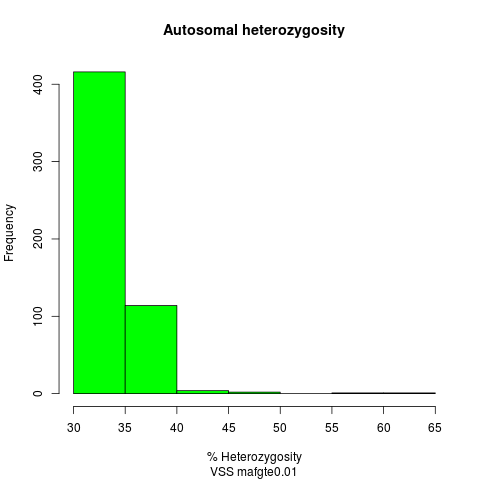

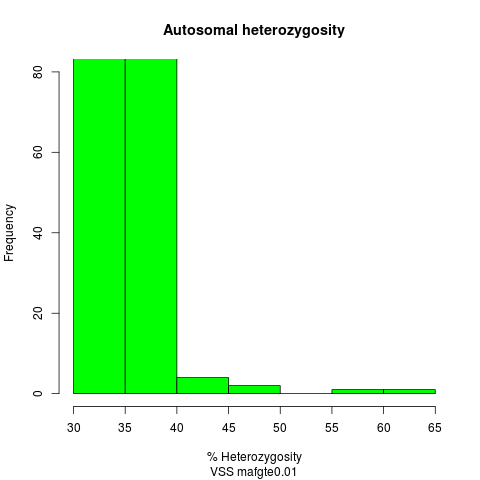

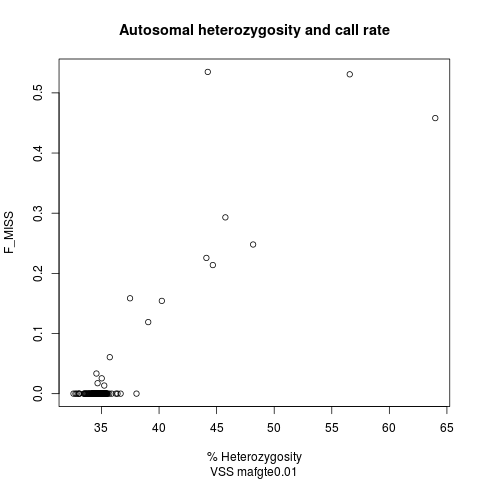

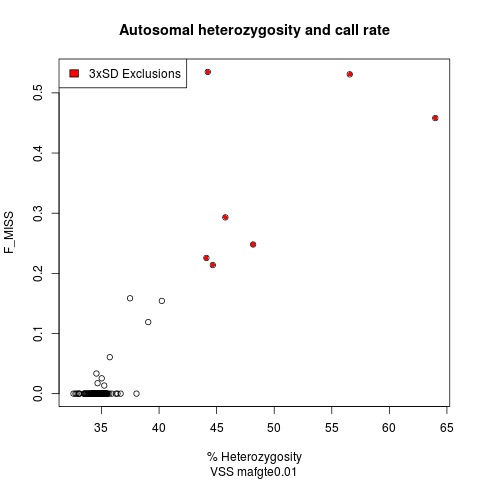

In [60]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (3)    Heterozygosity   MAFâ‰¥1% and MAF<1%                                                                   #
# -----------------------------------------------------------------------------------------------------------------#

maf <- "mafgte0.01"
Het<-read.table(paste(dir,"Summary-", Cohort, "-chr1-22-", maf, "-recode.ped", sep =""), header=TRUE, fill=TRUE)
Aut_imiss<-read.table(paste(dir, Cohort, "-chr1-22-mafgte0.01-missing.imiss", sep=""), header=TRUE, fill=TRUE)
print(names(Het))
print(names(Aut_imiss))
print(dim(Het))
print(dim(Aut_imiss))
print(head(Het))
print(head(Aut_imiss))
hist(Het$Percent_het, freq=TRUE, col="green", border ="black", main = "Autosomal heterozygosity", sub = paste(Cohort, maf, sep=" "), xlab="% Heterozygosity", ylab="Frequency")
hist(Het$Percent_het, freq=TRUE, col="green", border ="black", main = "Autosomal heterozygosity", sub = paste(Cohort, maf, sep=" "), xlab="% Heterozygosity", ylab="Frequency", ylim= c(0,80))
Het_Aut_imiss <- data.frame(ID=Het$ID, Percent_het=Het$Percent_het, ID2=Aut_imiss$IID, F_MISS=Aut_imiss$F_MISS)
write.table(Het_Aut_imiss, file="Het_Aut_imiss_mafgte001.txt", sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)
print(dim(Het_Aut_imiss))
print(names(Het_Aut_imiss))
print(head(Het_Aut_imiss))
plot(Het_Aut_imiss$Percent_het, Het_Aut_imiss$F_MISS, main = "Autosomal heterozygosity and call rate", sub = paste(Cohort, maf, sep=" "),xlab="% Heterozygosity", ylab="F_MISS")
#Checking to see if any samples are more than 3xSD away from the mean.
print(summary(Het$Percent_het))
print( mean(Het$Percent_het, na.rm=T)-3*sd(Het$Percent_het, na.rm=T))
print(mean(Het$Percent_het, na.rm=T)+3*sd(Het$Percent_het, na.rm=T))
line1<-mean(Het$Percent_het, na.rm=T)-3*sd(Het$Percent_het, na.rm=T)
line2<-mean(Het$Percent_het, na.rm=T)+3*sd(Het$Percent_het, na.rm=T)
print(line2)
print(which(Het$Percent_het>line2))
print(Het$Percent_het[which(Het$Percent_het>line2)])
more_line2 <- which(Het$Percent_het>line2)
print(length(more_line2))
print(line1)
print(which(Het$Percent_het<line1))
print(Het$Percent_het[which(Het$Percent_het<line1)])
less_line1 <- which(Het$Percent_het<line1)
print(length(less_line1))
# PLOTTING 3SD samples ON THE CALLRATE/HET PLOT:

Exclu <- Het_Aut_imiss[c(more_line2, less_line1),]
print(dim(Exclu))
print(Exclu)
plot(Het_Aut_imiss$Percent_het, Het_Aut_imiss$F_MISS, main = "Autosomal heterozygosity and call rate", sub = paste(Cohort, maf, sep=" ") ,xlab="% Heterozygosity", ylab="F_MISS")
temp <- subset(Exclu)		
points(temp$Percent_het, temp$F_MISS, col="red", pch=16, cex=0.8)
legend("topleft", c("3xSD Exclusions"), fill=c("red"))
identify(Het_Aut_imiss$Percent_het, Het_Aut_imiss$F_MISS, labels=Het_Aut_imiss$ID)
write.table(Exclu, paste(dir,Cohort, "_hetcheck_fails_mafgte001.txt", sep=""), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)


# You have to repeat the analysis for maf <1%
# Copy the "het maf <1%" results to your pwd. 
#cp <path to the files>/VSS_hetcheck_fails_mafless001.txt $DIR/


 [1] "FID1"   "IID1"   "FID2"   "IID2"   "RT"     "EZ"     "Z0"     "Z1"    
 [9] "Z2"     "PI_HAT" "PHE"    "DST"    "PPC"    "RATIO" 
[1] 144453     14
         FID1        IID1         FID2         IID2 RT EZ     Z0     Z1     Z2
1 BadSample_6 BadSample_6  BadSample_7  BadSample_7 UN NA 0.9632 0.0296 0.0072
2 BadSample_6 BadSample_6  BadSample_8  BadSample_8 UN NA 0.9783 0.0000 0.0217
3 BadSample_6 BadSample_6  BadSample_9  BadSample_9 UN NA 0.9588 0.0306 0.0106
4 BadSample_6 BadSample_6 BadSample_10 BadSample_10 UN NA 0.9590 0.0217 0.0193
5 BadSample_6 BadSample_6  BadSample_1  BadSample_1 UN NA 1.0000 0.0000 0.0000
6 BadSample_6 BadSample_6  BadSample_2  BadSample_2 UN NA 0.6482 0.3518 0.0000
  PI_HAT PHE      DST    PPC  RATIO
1 0.0220  -1 0.793214 0.9282 2.1214
2 0.0217  -1 0.792322 0.4684 1.9937
3 0.0259  -1 0.794018 0.9926 2.2087
4 0.0302  -1 0.795119 0.9539 2.1402
5 0.0000  -1 0.652259 0.0000 1.4703
6 0.1759  -1 0.790623 1.0000 3.4382
   Min. 1st Qu.  Median    Mean 3rd Qu.  

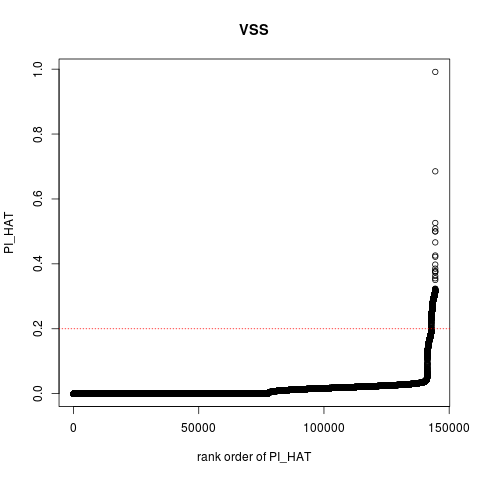

In [73]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (4)   DUPLICATES - RELATEDNESS                                  
# -----------------------------------------------------------------------------------------------------------------#

maf <- "mafgte0.01"
Cohort <- "VSS"
genome<-read.table(paste(dir, "tab-", Cohort, "-chr1-22-", maf, "-noCR-LDpruned0.2-genome.genome", sep =""), sep = "\t", header=TRUE, fill=TRUE)
print(names(genome))
print(dim(genome))
print(head(genome))
print(summary(genome$PI_HAT))

#Plotting the PIHATs in rank order
sorted_PI_HAT <- sort(genome$PI_HAT)
plot(sorted_PI_HAT, main= file, xlab= "rank order of PI_HAT", ylab = "PI_HAT")
abline(h=0.2,col=2,lty=3)

#subsetting out the duplicates (PH_HAT > 0.9)
wPiHatmore0.9 <- which(genome$PI_HAT > 0.9)
print(length(wPiHatmore0.9))
print(head(wPiHatmore0.9))
PiHatmore0.9 <- genome[wPiHatmore0.9,]
dupnumber <- dim(PiHatmore0.9)[1]

#With the duplicates excluded (PI_HAT>0.9) what is the range for the remaining comparisons?
PiHatless0.9 <- genome[-wPiHatmore0.9,]
print(max(PiHatless0.9$PI_HAT)) 
print(min(PiHatless0.9$PI_HAT)) 

#Numbering the duplicate pairs and writing the file out for excel:
PiHatmore0.9$Dup <- (1:nrow(PiHatmore0.9))
write.table(PiHatmore0.9, paste(dir, dupnumber, "_", Cohort,  "_PI_HATmore0.9", sep=""), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)


#subsetting out the duplicates (PH_HAT > 0.2)
wPiHatmore0.2 <- which(genome$PI_HAT > 0.2)
print(length(wPiHatmore0.2))
print(head(wPiHatmore0.2))
PiHatmore0.2 <- genome[wPiHatmore0.2,]
dupnumber <- dim(PiHatmore0.2)[1]

PiHatless0.2 <- genome[-wPiHatmore0.2,]
print(max(PiHatless0.2$PI_HAT)) 
print(min(PiHatless0.2$PI_HAT))


PiHatmore0.2$Dup <- (1:nrow(PiHatmore0.2))
write.table(PiHatmore0.2, paste(dir, dupnumber, "_", Cohort,  "_PI_HATmore0.2", sep=""), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)


We have to find the samples that appear to be related to many other individuals.

```

ExcludeIDsonIBD.r

```
Change the paths to file1,2 & 3.

R CMD BATCH ExcludeIDsonIBD.r

[1] 1630   13
 [1] "FID" "IID" "SOL" "C1"  "C2"  "C3"  "C4"  "C5"  "C6"  "C7"  "C8"  "C9" 
[13] "C10"
              FID             IID SOL         C1         C2         C3
1 BadSample_1_vss BadSample_1_vss   0 -0.0434356 -0.0179919 0.08925240
2 BadSample_2_vss BadSample_2_vss   0  0.0256251 -0.0269090 0.02443470
3 BadSample_3_vss BadSample_3_vss   0 -0.0233034 -0.0254609 0.07297190
4 BadSample_4_vss BadSample_4_vss   0  0.0274658 -0.0265455 0.02208580
5 BadSample_5_vss BadSample_5_vss   0 -0.0167771 -0.0255766 0.08271490
6 BadSample_6_vss BadSample_6_vss   0  0.0224068 -0.0216258 0.00620636
         C4          C5           C6           C7           C8          C9
1 0.3028320  0.01403290  0.000211676 -0.006103420  0.000149211  0.00152770
2 0.0753707  0.00120041 -0.002583550  0.009672010  0.002104630  0.00168792
3 0.2440300  0.01481730 -0.003012130 -0.000501484 -0.000988815 -0.00049926
4 0.0592545  0.00187201 -0.001563390  0.007487680  0.002352910  0.00057410
5 0.2830580  0.01451290 -0

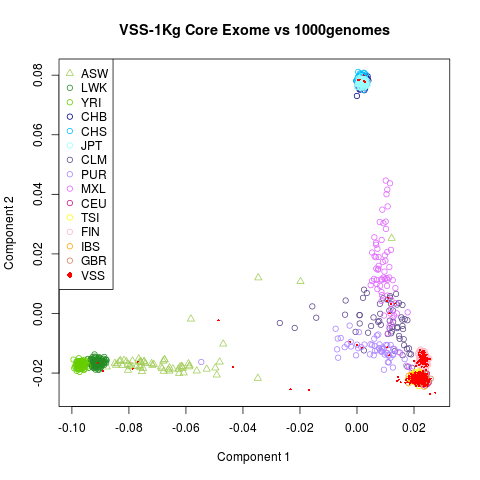

In [92]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (5)   ETHNICITY           Merged with 1000 genomes file                                                     #
# -----------------------------------------------------------------------------------------------------------------#

#Populationfile-1kg.txt

Cohort <- "VSS-1Kg"
file <- "chr1-22-mafgte0.01-noCR-LDpruned0.2-genome-mds.mds"
Graph_title <- paste(Cohort,chip, "vs 1000genomes", sep=" ")
genome <- read.table(paste(Cohort, "-", file, sep=""), header=TRUE)
pop_info <- read.table(paste(dir, "Populationfile-1kg.txt", sep="/"), sep="\t", header=TRUE)
print(dim(genome))
print(names(genome))
print(head(genome))
print(dim(pop_info))
print(names(pop_info))
print(head(pop_info))
print(table(pop_info$Population))

##Merge the population information from pop_info into the genome data
genome_popinfo <- merge(genome, pop_info, by.x = "FID", by.y = "ID", all.x = TRUE)
write.table(genome_popinfo, file="Genome_Popinfo.txt", sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)
print(dim(genome_popinfo))
print(names(genome_popinfo))
print(head(genome_popinfo))
print(summary(genome_popinfo$Population))

#Plotting C1 and C2 - subsetting by population

plot(genome_popinfo$C1, genome_popinfo$C2, col="white", main= Graph_title , xlab="Component 1", ylab="Component 2") #change to white for plot
temp <- subset(genome_popinfo, genome_popinfo$Population=="ASW") # HapMap African ancestry individuals from SW US
points(temp$C1, temp$C2, col="darkolivegreen3", pch=2)
temp <- subset(genome_popinfo, genome_popinfo$Population=="LWK") # (LWK) Luhya individuals
points(temp$C1, temp$C2, col="forestgreen")
temp <- subset(genome_popinfo, genome_popinfo$Population=="YRI") # (YRI) Yoruba individuals
points(temp$C1, temp$C2, col="chartreuse3")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CHB") # (CHB) Han Chinese in Beijing
points(temp$C1, temp$C2, col="darkblue")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CHS")# (CHS) Han Chinese South
points(temp$C1, temp$C2, col="deepskyblue")
temp <- subset(genome_popinfo, genome_popinfo$Population=="JPT")# JPT Japanese individuals
points(temp$C1, temp$C2, col="darkslategray1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CLM")# Colombian in Medellin, Colombia
points(temp$C1, temp$C2, col="mediumpurple4")
temp <- subset(genome_popinfo, genome_popinfo$Population=="PUR")# Puerto Rican in Puerto Rico
points(temp$C1, temp$C2, col="mediumpurple1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="MXL")# HapMap Mexican individuals from LA California
points(temp$C1, temp$C2, col="mediumorchid1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CEU")# CEPH individuals
points(temp$C1, temp$C2, col="mediumvioletred")
temp <- subset(genome_popinfo, genome_popinfo$Population=="TSI")# Toscan individuals
points(temp$C1, temp$C2, col="yellow")
temp <- subset(genome_popinfo, genome_popinfo$Population=="FIN")# HapMap Finnish individuals from Finland
points(temp$C1, temp$C2, col="pink1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="IBS")# Iberian populations in Spain
points(temp$C1, temp$C2, col="orange")
temp <- subset(genome_popinfo, genome_popinfo$Population=="GBR")# British individuals from England and Scotland (GBR)
points(temp$C1, temp$C2, col="lightsalmon3")
temp <- subset(genome_popinfo, genome_popinfo$Population=="VSS")#data = VSS samples
points(temp$C1, temp$C2, col="red", pch=16, cex=0.4)
legend("topleft", c("ASW","LWK","YRI","CHB","CHS","JPT","CLM","PUR","MXL","CEU","TSI","FIN","IBS","GBR","VSS"), pch=c(2,1,1,1,1,1,1,1,1,1,1,1,1,1,16), col=c("darkolivegreen3","forestgreen","chartreuse3","darkblue","deepskyblue","darkslategray1","mediumpurple4","mediumpurple1","mediumorchid1","mediumvioletred","yellow","pink1","orange","lightsalmon3","red"))



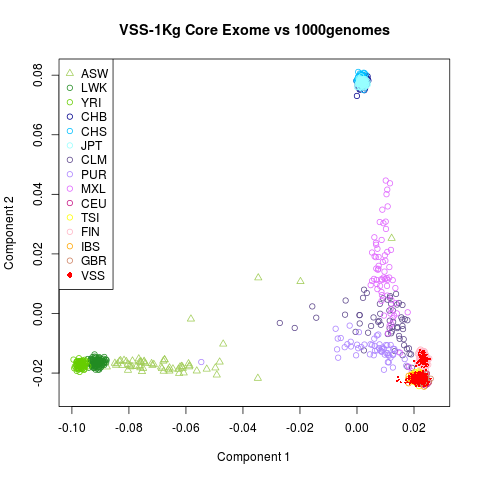

In [91]:
%%R

# Identify the outliers, remove them from the population file (Populationfile-1kg_rmoutliers.txt) and plot again
#Can you do this by using this file Populationfile-1kg_rmoutliers.txt

pop_info <- read.table(paste(dir, "Populationfile-1kg_rmoutliers.txt", sep="/"), sep="\t", header=TRUE)
genome_popinfo <- merge(genome, pop_info, by.x = "FID", by.y = "ID", all.x = TRUE)

plot(genome_popinfo$C1, genome_popinfo$C2, col="white", main= Graph_title , xlab="Component 1", ylab="Component 2") #change to white for plot
temp <- subset(genome_popinfo, genome_popinfo$Population=="ASW") # HapMap African ancestry individuals from SW US
points(temp$C1, temp$C2, col="darkolivegreen3", pch=2)
temp <- subset(genome_popinfo, genome_popinfo$Population=="LWK") # (LWK) Luhya individuals
points(temp$C1, temp$C2, col="forestgreen")
temp <- subset(genome_popinfo, genome_popinfo$Population=="YRI") # (YRI) Yoruba individuals
points(temp$C1, temp$C2, col="chartreuse3")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CHB") # (CHB) Han Chinese in Beijing
points(temp$C1, temp$C2, col="darkblue")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CHS")# (CHS) Han Chinese South
points(temp$C1, temp$C2, col="deepskyblue")
temp <- subset(genome_popinfo, genome_popinfo$Population=="JPT")# JPT Japanese individuals
points(temp$C1, temp$C2, col="darkslategray1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CLM")# Colombian in Medellin, Colombia
points(temp$C1, temp$C2, col="mediumpurple4")
temp <- subset(genome_popinfo, genome_popinfo$Population=="PUR")# Puerto Rican in Puerto Rico
points(temp$C1, temp$C2, col="mediumpurple1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="MXL")# HapMap Mexican individuals from LA California
points(temp$C1, temp$C2, col="mediumorchid1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CEU")# CEPH individuals
points(temp$C1, temp$C2, col="mediumvioletred")
temp <- subset(genome_popinfo, genome_popinfo$Population=="TSI")# Toscan individuals
points(temp$C1, temp$C2, col="yellow")
temp <- subset(genome_popinfo, genome_popinfo$Population=="FIN")# HapMap Finnish individuals from Finland
points(temp$C1, temp$C2, col="pink1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="IBS")# Iberian populations in Spain
points(temp$C1, temp$C2, col="orange")
temp <- subset(genome_popinfo, genome_popinfo$Population=="GBR")# British individuals from England and Scotland (GBR)
points(temp$C1, temp$C2, col="lightsalmon3")
temp <- subset(genome_popinfo, genome_popinfo$Population=="VSS")#data = VSS samples
points(temp$C1, temp$C2, col="red", pch=16, cex=0.4)
legend("topleft", c("ASW","LWK","YRI","CHB","CHS","JPT","CLM","PUR","MXL","CEU","TSI","FIN","IBS","GBR","VSS"), pch=c(2,1,1,1,1,1,1,1,1,1,1,1,1,1,16), col=c("darkolivegreen3","forestgreen","chartreuse3","darkblue","deepskyblue","darkslategray1","mediumpurple4","mediumpurple1","mediumorchid1","mediumvioletred","yellow","pink1","orange","lightsalmon3","red"))


[1] "/nfs/team144/VolosSummerSchool/data/Workshop2_QC/All_data/"
 [1] VSS GBR FIN CHS PUR CLM IBS CEU YRI CHB JPT LWK ASW MXL TSI
22 Levels: ACB ASW CDX CEU CHB CHD CHS CLM FIN GBR GIH IBS JPT KHV LWK ... YRI
   [1] "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21"
   [9] "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21" "VSS 21" "GBR 10"
  [17] "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10"
  [25] "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10"
  [33] "VSS 21" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21"
  [41] "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21"
  [49] "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10"
  [57] "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10"
  [65] "VSS 21" "GBR 10" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21"
  [73] "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21" "GBR 10" "VSS 21"
 

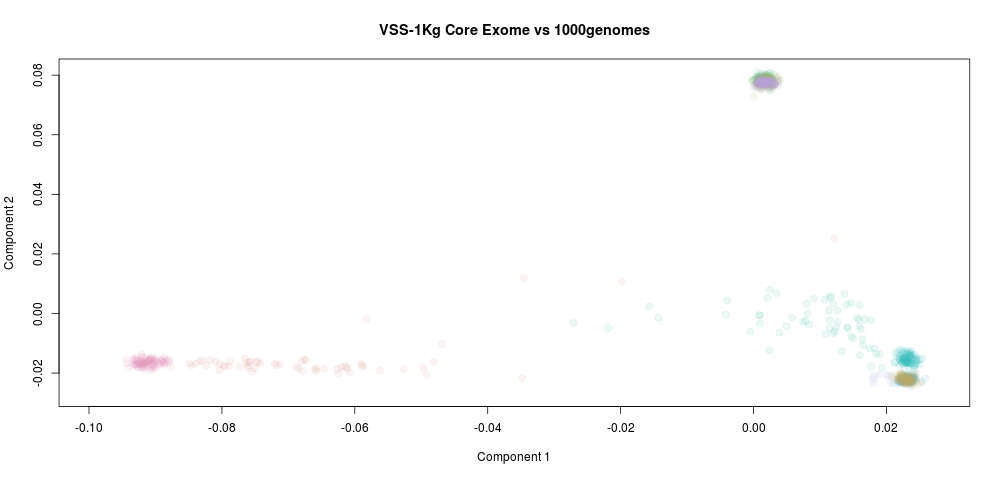

In [45]:
%%R -w 1000
print(dir)
dir="<path to the files>"
Graph_title <- paste(Cohort,chip, "vs 1000genomes", sep=" ")
genome <- read.table(paste0(dir, "VSS-1Kg-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome-mds.mds"), header=TRUE)
pop_info <- read.table(paste(dir, "Populationfile-1kg.txt", sep="/"), sep="\t", header=TRUE)


##Merge the population information from pop_info into the genome data
genome_popinfo <- merge(genome, pop_info, by.x = "FID", by.y = "ID", all.x = TRUE)

#Plotting C1 and C2 - subsetting by population
library(colorspace)
pal=c(rainbow_hcl(length(unique(genome_popinfo$Population))))
pal[1]="black"
pal=adjustcolor(pal, alpha=0.1)
plot(genome_popinfo$C1, genome_popinfo$C2, pch=20, cex=2, 
     col=pal[genome_popinfo$Population], main= Graph_title , xlab="Component 1", ylab="Component 2") #change to white for plot
print(unique(genome_popinfo$Population))
paste(genome_popinfo$Population, as.numeric(genome_popinfo$Population))


In [2]:
%load_ext rpy2.ipython

#### Combine all outliers' files and exclude them from your data

```
plink --bfile $DIR/VSS --remove Final_exclusionlist.txt --make-bed --out $DIR/VSS_sampleQCed

```

## Variant QC

It consists of (at least) four steps:

    1.Identification of variants with an excessive missing genotype
    2.Identification of variants demonstrating a significant deviation from Hardy-Weinberg equilibrium (HWE)
    3.Removal of all makers with a very low minor allele frequency
    4.Removal of all makers with cluster separation score <0.4

The criteria used to filter out low quality markers differ from study to study
Variant QC must be done with great care as every removed marker is potentially a missed disease variant
Imputation can be used to recover some of the excluded markers

Here we are using the following thresholds:

Call rate = 98%
Hwe       = p <=1x10-4
MAF       = 1%
Cluster separation score = <=0.4

Q: Can you run the plink command for all these thresholds:

```
plink --bfile $DIR/VSS_sampleQCed --geno 0.02 --hwe 0.0001 --exclude cluster_sep_scr_to-exclude.txt --maf 0.01 --make-bed --out $DIR/VSS_sampleQCed_variantQCed

```